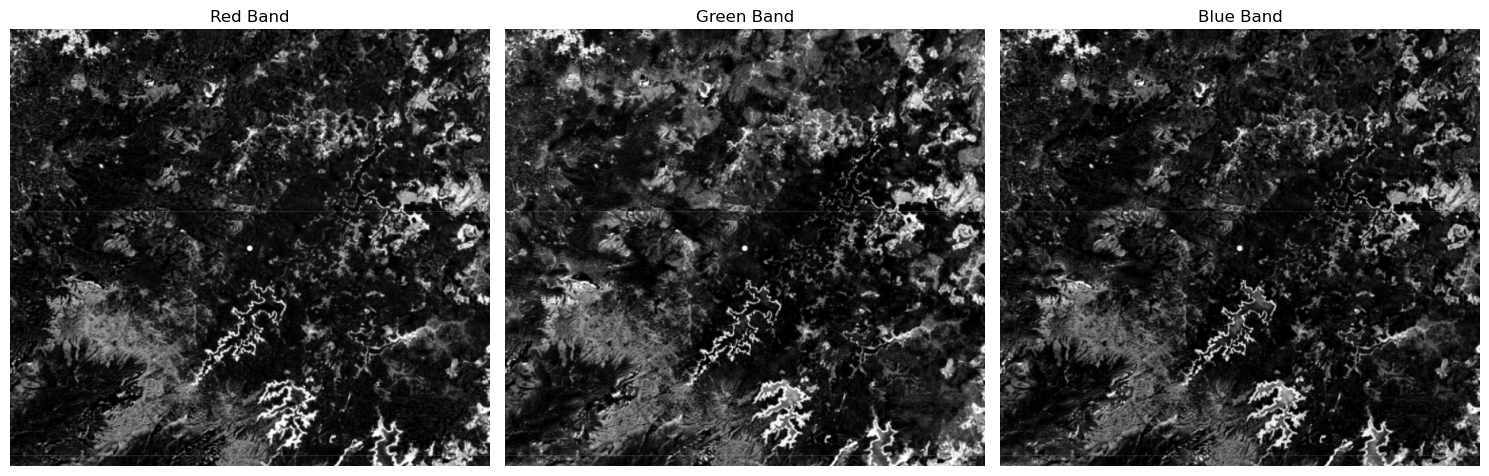

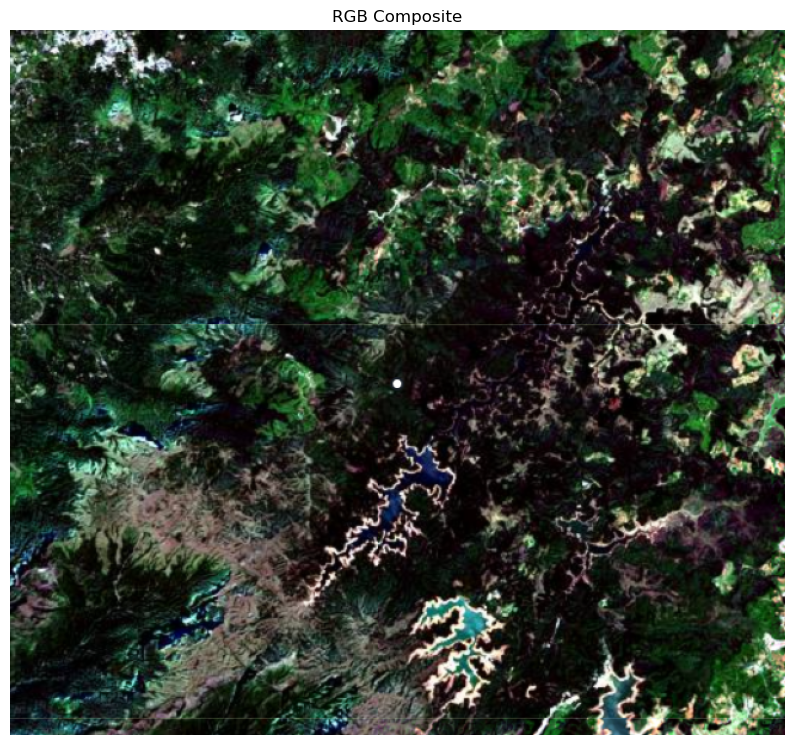

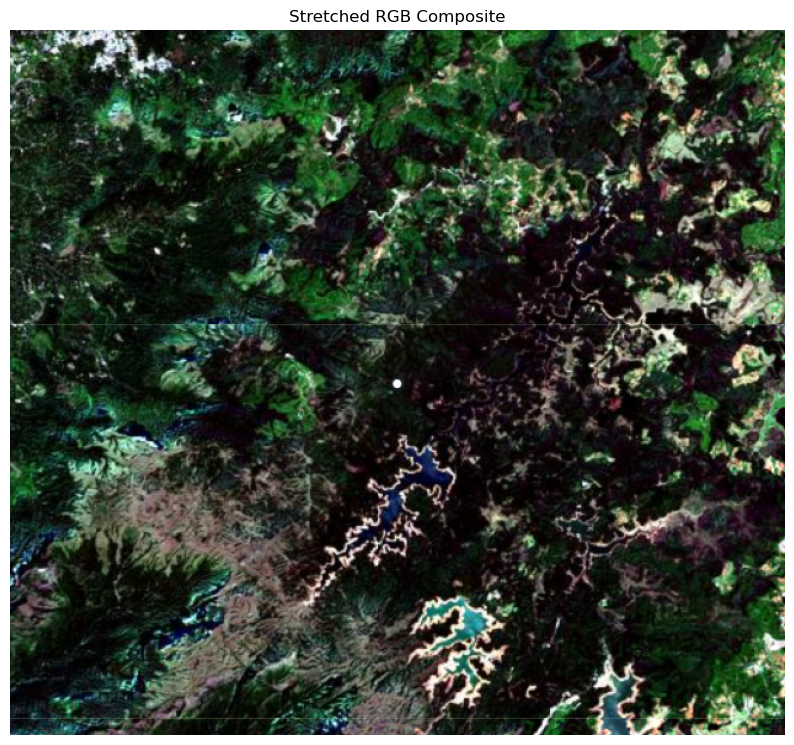

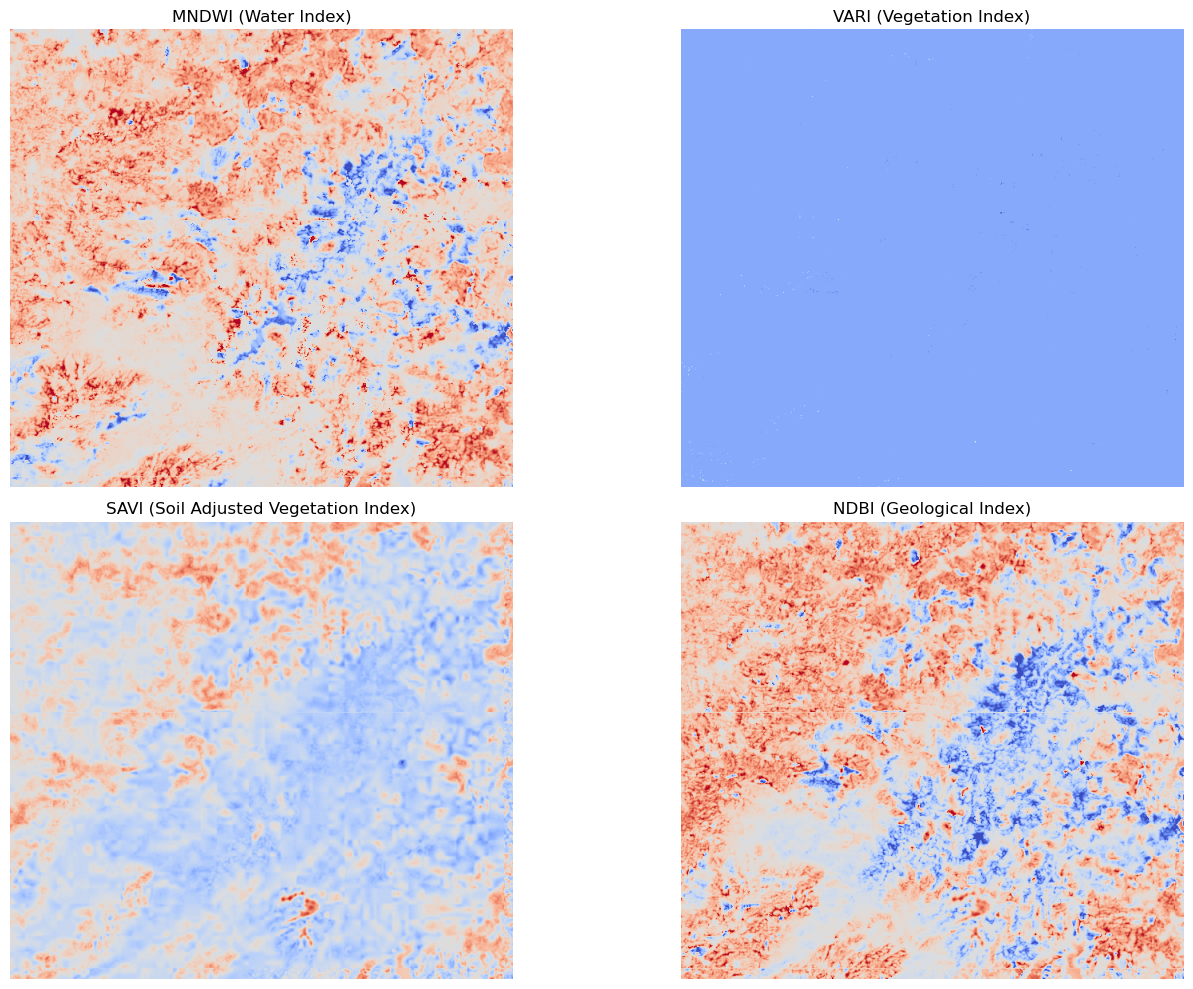

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Replace this with the path to your local image file
image_path = "C:\\Users\\saeem\\Pictures\\Saved Pictures\\Screenshot 2024-11-24 141946.png"  # Update this path with your actual image file path

# Open the image using PIL (Pillow)
img = Image.open(image_path).convert("RGB")

# Convert to NumPy array for processing
img_array = np.array(img)

# Split into Red, Green, Blue channels
red = img_array[:, :, 0].astype(float)
green = img_array[:, :, 1].astype(float)
blue = img_array[:, :, 2].astype(float)

# Normalize the bands
def normalize(array):
    # Adding a small epsilon to avoid division by zero
    epsilon = 1e-6
    return (array - array.min()) / (array.max() - array.min() + epsilon)

red = normalize(red)
green = normalize(green)
blue = normalize(blue)

# Visualize individual bands
bands = [red, green, blue]
band_names = ["Red", "Green", "Blue"]

plt.figure(figsize=(15, 10))
for i, band in enumerate(bands, start=1):
    plt.subplot(1, 3, i)
    plt.imshow(band, cmap="gray")
    plt.title(f"{band_names[i-1]} Band")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Create RGB Composite
rgb_composite = np.dstack((red, green, blue))

# Plot RGB Composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_composite)
plt.title("RGB Composite")
plt.axis("off")
plt.show()

# Apply histogram stretch (normalization)
def stretch_histogram(array):
    epsilon = 1e-6  # To prevent divide by zero
    return (array - array.min()) / (array.max() - array.min() + epsilon)

stretched_rgb = np.dstack((
    stretch_histogram(red),
    stretch_histogram(green),
    stretch_histogram(blue),
))

plt.figure(figsize=(10, 10))
plt.imshow(stretched_rgb)
plt.title("Stretched RGB Composite")
plt.axis("off")
plt.show()

# --- Indices Calculation ---
# MNDWI (Water Index) = (Green - Blue) / (Green + Blue)
# Adding small epsilon to avoid divide by zero
mndwi = (green - blue) / (green + blue + 1e-6)

# VARI (Vegetation Index) = (Green - Red) / (Green + Red - Blue)
vari = (green - red) / (green + red - blue + 1e-6)

# SAVI (Soil Adjusted Vegetation Index) = ((Green - Red) * (1 + L)) / (Green + Red + L)
L = 0.5  # Constant for SAVI
savi = ((green - red) * (1 + L)) / (green + red + L + 1e-6)

# NDBI (Normalized Difference Built-up Index) = (Green - Red) / (Green + Red)
ndbi = (green - red) / (green + red + 1e-6)

# --- Plot Indices ---
indices = [mndwi, vari, savi, ndbi]
index_names = ["MNDWI (Water Index)", "VARI (Vegetation Index)", "SAVI (Soil Adjusted Vegetation Index)", "NDBI (Geological Index)"]

plt.figure(figsize=(15, 10))
for i, index in enumerate(indices, start=1):
    plt.subplot(2, 2, i)
    plt.imshow(normalize(index), cmap="coolwarm" if "Index" in index_names[i-1] else "RdYlGn")
    plt.title(index_names[i-1])  # Fix reference to index_names
    plt.axis("off")
plt.tight_layout()
plt.show()
